In [26]:
#      Convolutional network 

import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers
import tensorflow as tf
import argparse

from sklearn.preprocessing import LabelBinarizer

from keras.datasets import mnist  # En este módulo está MNIST en formato numpy

In [27]:
# Set model parameters

num_classes = 10
input_shape = (28, 28, 1)

# Load image sets for learning and testing

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Set image pixels in range [0, 1]

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Adjust and check dimension and number of image planes: (28, 28, 1)

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [28]:
# convert indicator vectors to binary matrices

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)


# create the convolutional network
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), kernel_initializer="glorot_uniform", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3),kernel_initializer="glorot_uniform", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),  #crear una capa densa de conexión completa (va cogiendo columnas y las pone una debajo de la otra)
        layers.Dropout(0.5),
        layers.Dense(num_classes, kernel_initializer="glorot_uniform", activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# Establish the parameters of the learning process
batch_size = 128

# epochs 
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [30]:
# function to extract iterations
class BatchHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epoch_losses = []
        self.epoch_accuracy = []
        self.batch_losses = []
        self.batch_accuracy = []

    def on_batch_end(self, batch, logs=None):
        # Save the results of each batch
        self.batch_losses.append(logs.get('loss'))
        self.batch_accuracy.append(logs.get('accuracy'))

    def on_epoch_end(self, epoch, logs=None):
        # Save the results of the epoch and reset for the next epoch
        self.epoch_losses.append(self.batch_losses)
        self.epoch_accuracy.append(self.batch_accuracy)
        self.batch_losses = []
        self.batch_accuracy = []

batch_history = BatchHistory()

history = model.fit(x_train, y_train, batch_size=500, epochs=epochs, validation_split=0.1, callbacks=[batch_history])


Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.6038 - loss: 1.3232 - val_accuracy: 0.9617 - val_loss: 0.1425
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9419 - loss: 0.1949 - val_accuracy: 0.9782 - val_loss: 0.0857
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.9605 - loss: 0.1287 - val_accuracy: 0.9825 - val_loss: 0.0669
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.9686 - loss: 0.1025 - val_accuracy: 0.9848 - val_loss: 0.0575
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.9723 - loss: 0.0911 - val_accuracy: 0.9863 - val_loss: 0.0516
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.9758 - loss: 0.0793 - val_accuracy: 0.9885 - val_loss: 0.0472
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.9785 - loss: 0.0685 - val_accuracy: 0.9888 - val_loss: 0.0455
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.9803 - loss: 0.0642 - val_accu

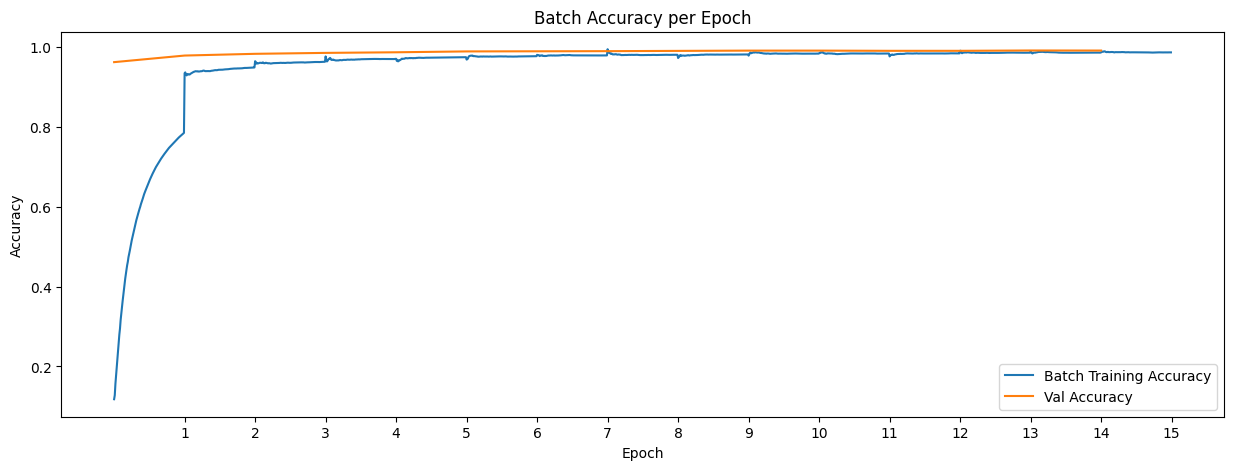

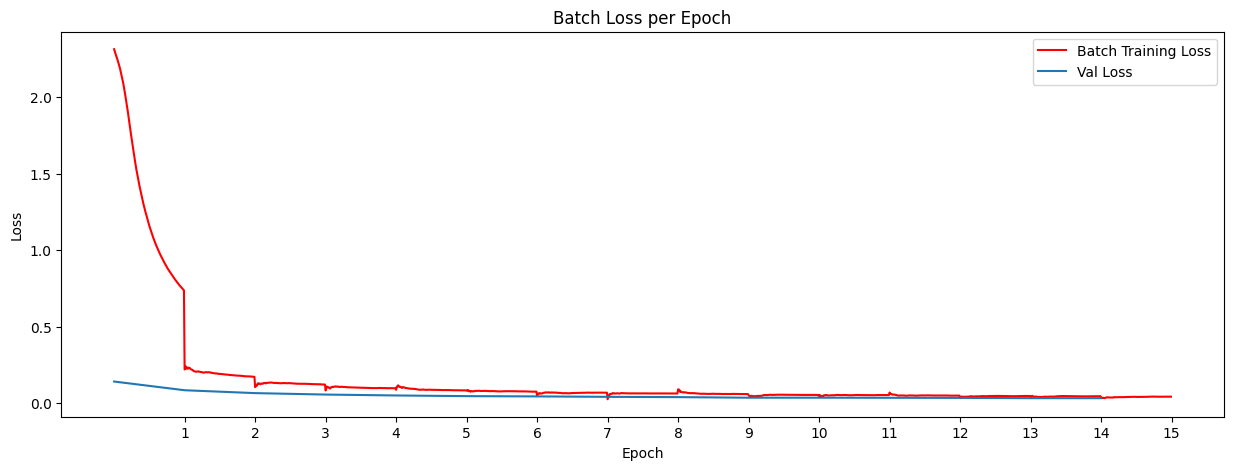

In [66]:
import matplotlib.pyplot as plt

# Initialize lists for x-axis points, accuracy, and loss values
epoch_points = []
accuracies = []
losses = []

# Calculate x-axis position for both accuracy and loss
for epoch_idx, (batch_acc, batch_loss) in enumerate(zip(batch_history.epoch_accuracy, batch_history.epoch_losses)):
    for batch_idx, (acc, loss) in enumerate(zip(batch_acc, batch_loss)):
        offset = batch_idx / len(batch_acc)
        epoch_points.append(epoch_idx + offset)
        accuracies.append(acc)
        losses.append(loss)

# Plot for accuracy
plt.figure(figsize=(15, 5))
plt.plot(epoch_points, accuracies, label='Batch Training Accuracy')  # Plot training accuracy per batch
plt.plot(history.history['val_accuracy'], label='Val Accuracy')  # Plot validation accuracy
plt.title('Batch Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(list(range(1, len(batch_history.epoch_accuracy) + 1)))  # Set x-axis ticks to match epochs
plt.show()

# Plot for loss
plt.figure(figsize=(15, 5))
plt.plot(epoch_points, losses, label='Batch Training Loss', color='red')  # Plot training loss per batch
plt.plot(history.history['val_loss'], label='Val Loss')  # Plot validation loss
plt.title('Batch Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.xticks(list(range(1, len(batch_history.epoch_losses) + 1)))  # Set x-axis ticks to match epochs
plt.show()